In [ ]:
import pandas as pd
import numpy as np
#import tiingo
import requests


#### Remove holdiays from timeseries

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()

holidays = cal.holidays(start='2000-01-01',
                        end='2030-12-30')

holiday_df = pd.DataFrame(data=holidays,
                          columns = ['date']).assign(holiday='USFederalHoliday')

holiday_df.rename(columns={'date':'ds'},inplace=True)
#holiday_df.to_csv('us_holidays_until_2030.csv')

In [ ]:
### First we will get the 15min time intervals and calculate the 15min Moving averages (10 perido, 20 period, 50 period)
### From the same data we will also calculate the 1d Moving averages (10 period, 20 period, 50 period) and
### Append the indicators to the dataframe 
### Each iteration will run for a single ticker


### The data extracts work in 0GMT => Exchange opens at 14:30 and closes at 21:00
### Convert this to Sofia/New-York time if needed


#### Connect to tiingo

In [ ]:
# 15min to # 1h 
headers = {
    'Content-Type': 'application/json'
}
requestResponse = requests.get("https://api.tiingo.com/iex/SPY/prices?startDate=2015-01-02&endDate=2022-12-31&resampleFreq=1hour&columns=open,high,low,close,volume&token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
#print(requestResponse.json())

In [ ]:
# 15min to # 1h 
headers = {
    'Content-Type': 'application/json'
}
requestResponse = requests.get("https://api.tiingo.com/tiingo/daily/BB/prices?startDate=2016-01-01&token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
#print(requestResponse.json())

In [ ]:
df_stock = pd.DataFrame(requestResponse.json()) 
df_stock

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-01-04T00:00:00.000Z,9.135,9.220,8.900,9.17,10952510,9.135,9.220,8.900,9.17,10952510,0.0,1.0
1,2016-01-05T00:00:00.000Z,8.860,9.170,8.830,9.09,7446834,8.860,9.170,8.830,9.09,7446834,0.0,1.0
2,2016-01-06T00:00:00.000Z,8.740,8.934,8.650,8.70,7696545,8.740,8.934,8.650,8.70,7696545,0.0,1.0
3,2016-01-07T00:00:00.000Z,8.000,8.630,7.850,8.59,13901207,8.000,8.630,7.850,8.59,13901207,0.0,1.0
4,2016-01-08T00:00:00.000Z,7.710,8.230,7.700,8.17,10399282,7.710,8.230,7.700,8.17,10399282,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,2022-11-28T00:00:00.000Z,4.800,4.875,4.760,4.80,4982255,4.800,4.875,4.760,4.80,4982255,0.0,1.0
1739,2022-11-29T00:00:00.000Z,4.840,4.880,4.700,4.81,4389614,4.840,4.880,4.700,4.81,4389614,0.0,1.0
1740,2022-11-30T00:00:00.000Z,4.870,4.890,4.645,4.82,11390974,4.870,4.890,4.645,4.82,11390974,0.0,1.0
1741,2022-12-01T00:00:00.000Z,5.080,5.135,4.875,4.88,8192195,5.080,5.135,4.875,4.88,8192195,0.0,1.0


In [ ]:
## This gets financial data
#requestResponse = requests.get("https://api.tiingo.com/tiingo/fundamentals/msft/statements?token=0ed744c7db5ef348139953912e2f3cee79f4608b", headers=headers)
#print(requestResponse.json)

In [ ]:
requestResponse

<Response [200]>

In [ ]:
df_stock = pd.DataFrame(requestResponse.json()) 

In [ ]:
df_stock

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-01-04T00:00:00.000Z,9.135,9.220,8.900,9.17,10952510,9.135,9.220,8.900,9.17,10952510,0.0,1.0
1,2016-01-05T00:00:00.000Z,8.860,9.170,8.830,9.09,7446834,8.860,9.170,8.830,9.09,7446834,0.0,1.0
2,2016-01-06T00:00:00.000Z,8.740,8.934,8.650,8.70,7696545,8.740,8.934,8.650,8.70,7696545,0.0,1.0
3,2016-01-07T00:00:00.000Z,8.000,8.630,7.850,8.59,13901207,8.000,8.630,7.850,8.59,13901207,0.0,1.0
4,2016-01-08T00:00:00.000Z,7.710,8.230,7.700,8.17,10399282,7.710,8.230,7.700,8.17,10399282,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,2022-11-28T00:00:00.000Z,4.800,4.875,4.760,4.80,4982255,4.800,4.875,4.760,4.80,4982255,0.0,1.0
1739,2022-11-29T00:00:00.000Z,4.840,4.880,4.700,4.81,4389614,4.840,4.880,4.700,4.81,4389614,0.0,1.0
1740,2022-11-30T00:00:00.000Z,4.870,4.890,4.645,4.82,11390974,4.870,4.890,4.645,4.82,11390974,0.0,1.0
1741,2022-12-01T00:00:00.000Z,5.080,5.135,4.875,4.88,8192195,5.080,5.135,4.875,4.88,8192195,0.0,1.0


In [ ]:
df_stock.date = pd.to_datetime(df_stock.date)

In [ ]:
df_stock.date.dt.date

0       2016-01-04
1       2016-01-05
2       2016-01-06
3       2016-01-07
4       2016-01-08
           ...    
1738    2022-11-28
1739    2022-11-29
1740    2022-11-30
1741    2022-12-01
1742    2022-12-02
Name: date, Length: 1743, dtype: object

In [ ]:
## Remove the US public holidays
df_stock = df_stock[~df_stock.date.dt.date.isin(holiday_df.ds)]

c:\Users\IvanIvanov\Anaconda3\lib\site-packages\pandas\core\algorithms.py:524: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



In [ ]:
df_stock.dtypes

date           datetime64[ns, UTC]
close                      float64
high                       float64
low                        float64
open                       float64
volume                       int64
adjClose                   float64
adjHigh                    float64
adjLow                     float64
adjOpen                    float64
adjVolume                    int64
divCash                    float64
splitFactor                float64
dtype: object

#### Prophet

In [ ]:
from prophet import Prophet

In [ ]:
df_stock.rename(columns={"date": "ds", "close": "y"},inplace=True)

c:\Users\IvanIvanov\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_stock

,ds,y,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-01-04 00:00:00+00:00,9.135,9.220,8.900,9.17,10952510,9.135,9.220,8.900,9.17,10952510,0.0,1.0
1,2016-01-05 00:00:00+00:00,8.860,9.170,8.830,9.09,7446834,8.860,9.170,8.830,9.09,7446834,0.0,1.0
2,2016-01-06 00:00:00+00:00,8.740,8.934,8.650,8.70,7696545,8.740,8.934,8.650,8.70,7696545,0.0,1.0
3,2016-01-07 00:00:00+00:00,8.000,8.630,7.850,8.59,13901207,8.000,8.630,7.850,8.59,13901207,0.0,1.0
4,2016-01-08 00:00:00+00:00,7.710,8.230,7.700,8.17,10399282,7.710,8.230,7.700,8.17,10399282,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,2022-11-28 00:00:00+00:00,4.800,4.875,4.760,4.80,4982255,4.800,4.875,4.760,4.80,4982255,0.0,1.0
1739,2022-11-29 00:00:00+00:00,4.840,4.880,4.700,4.81,4389614,4.840,4.880,4.700,4.81,4389614,0.0,1.0
1740,2022-11-30 00:00:00+00:00,4.870,4.890,4.645,4.82,11390974,4.870,4.890,4.645,4.82,11390974,0.0,1.0
1741,2022-12-01 00:00:00+00:00,5.080,5.135,4.875,4.88,8192195,5.080,5.135,4.875,4.88,8192195,0.0,1.0


In [ ]:
df_stock.ds = df_stock.ds.dt.tz_convert(None)

c:\Users\IvanIvanov\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_stock.ds.dt.day_name().value_counts()

Tuesday      358
Wednesday    357
Thursday     353
Friday       349
Monday       325
Name: ds, dtype: int64

In [ ]:
# Python
m = Prophet(holidays=holiday_df, growth = 'linear')
# m = Prophet(holidays=holiday_df, growth = 'linear')
m.fit(df_stock[['ds','y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [ ]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2102,2023-11-28
2103,2023-11-29
2104,2023-11-30
2105,2023-12-01
2106,2023-12-02


#### Prediction results

In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

,ds,yhat,yhat_lower,yhat_upper
2093,2023-11-19,0.186964,-3.133994,3.220028
2094,2023-11-20,-1.063084,-4.393365,1.901600
2095,2023-11-21,-1.066369,-4.567224,2.072753
2096,2023-11-22,-1.063285,-4.540240,1.977937
2097,2023-11-23,-1.098362,-4.465276,1.993698
2098,2023-11-24,-1.126201,-4.603580,2.045667
2099,2023-11-25,0.126406,-3.204115,3.278428
2100,2023-11-26,0.118678,-3.202593,3.252202
2101,2023-11-27,-1.126534,-4.699193,2.205174
2102,2023-11-28,-1.125989,-4.483926,2.074574


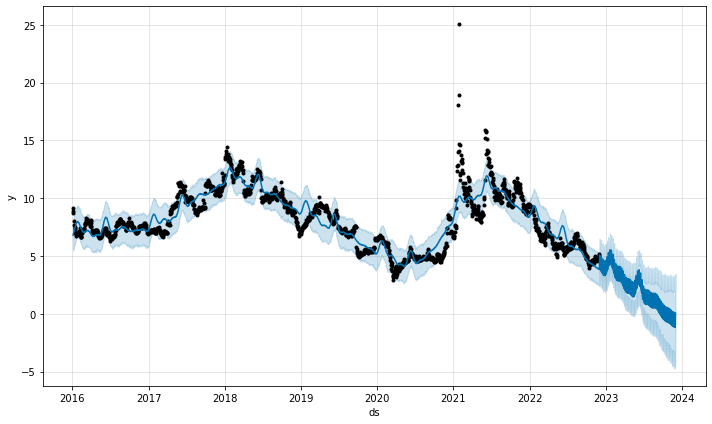

In [ ]:
# Python
fig1 = m.plot(forecast)

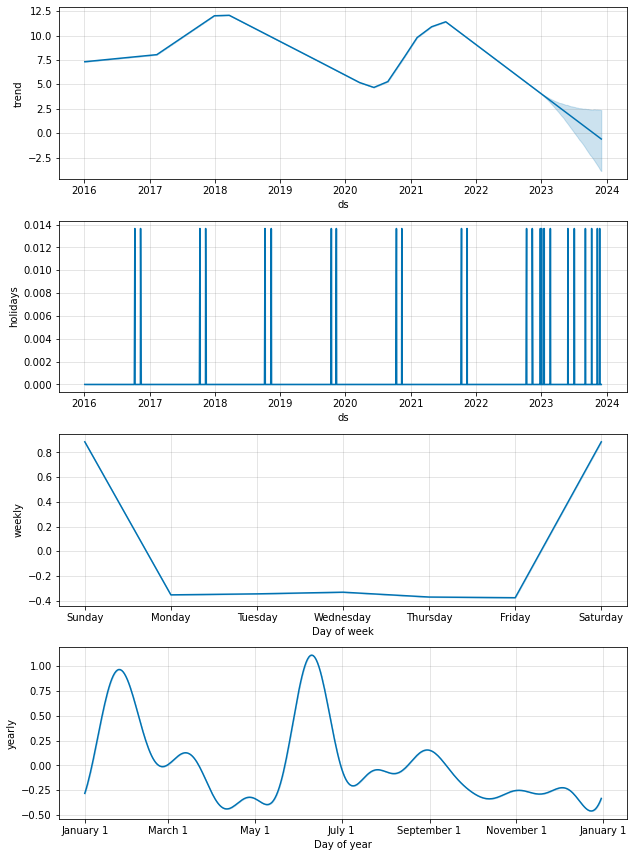

In [ ]:
# Python
fig2 = m.plot_components(forecast)

In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
# Python
plot_components_plotly(m, forecast)

In [ ]:
top_by_volume = pd.read_csv('top_by_volume.csv')

In [ ]:
top_by_volume.Ticker.values

array(['MSFT', 'GOOGL', 'AMZN', 'BRK-B', 'TSLA', 'UNH', 'JNJ', 'XOM', 'V',
       'TSM', 'NVDA', 'WMT', 'JPM', 'PG', 'CVX', 'LLY', 'MA', 'HD',
       'META', 'BAC', 'BABA', 'NVO', 'PFE', 'ABBV', 'MRK', 'KO', 'PEP',
       'ASML', 'ORCL', 'AVGO', 'SHEL', 'COST', 'TMO', 'AZN', 'CSCO', 'TM',
       'ACN', 'NVS', 'MCD', 'DHR', 'RDS-A', 'TMUS', 'ABT', 'DIS', 'WFC',
       'NKE', 'BMY', 'NEE', 'LIN', 'UPS', 'TTE', 'TXN', 'VZ', 'ADBE',
       'BHP', 'PM', 'MS', 'CMCSA', 'COP', 'AMGN', 'SCHW', 'CRM', 'RTX',
       'HON', 'QCOM', 'NFLX', 'RY', 'SAP', 'T', 'IBM', 'CVS', 'DE', 'UNP',
       'UL', 'LOW', 'GS', 'LMT', 'HSBC', 'ELV', 'AMD', 'TD', 'EQNR',
       'INTC', 'CAT', 'DEO', 'SBUX', 'SIEGY', 'SPGI', 'BP', 'AXP', 'INTU',
       'SNY', 'SONY', 'NTTYY', 'RIO', 'ADP', 'GILD', 'BLK', 'PLD', 'MDT',
       'HDB', 'BA', 'BUD', 'AMT', 'BTI', 'CI', 'ISRG', 'JD', 'GE', 'MDLZ',
       'C', 'TJX', 'AMAT', 'SYK', 'CB', 'CNI', 'PYPL', 'ADI', 'INFY',
       'NOW', 'MMC', 'MO', 'ENB', 'REGN', 'EL', 'EOG', 'V

In [ ]:
# import xgboost as xgb 
# clf_xgb = xgb.XGBRegressor(objective='reg:squarederror', 
#                             tree_method = 'gpu_hist',
#                             gamma = 0.5,
#                            max_depth = 25,
#                             seed=42,
#                             n_estimators=30)

In [ ]:
# clf_xgb.fit(X_train,
#             y_train,
#            verbose=True,
#             early_stopping_rounds=20,
#             eval_metric='rmse',   #aucpr,auc, map
#             eval_set=[(X_test,y_test)])